In [1]:
# Practice notebook for Flower Dataset Image Classification

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
!rmdir flowers --ignore 

rmdir: failed to remove 'flowers': No such file or directory


In [ ]:
!unzip 'flowers-recognition.zip'

In [ ]:
import keras
import numpy as np
import tensorflow as tf
import random as rn
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
#for preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#for the model
from keras.applications.inception_v3 import InceptionV3,inception_v3, preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Activation,MaxPool2D,Dropout,Flatten,BatchNormalization,Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
X = []
Z = []
FLOWER_TULIP_DIR = "flowers/tulip/"
FLOWER_SUNFLOWER_DIR = "flowers/sunflower/"
FLOWER_ROSE_DIR = "flowers/rose"
FLOWER_DAISY_DIR = "flowers/daisy"
FLOWER_DANDELION_DIR = "flowers/dandelion/"

In [ ]:
image_size = 224

In [ ]:
def assign_labels(img,flower_type):
  return flower_type

In [ ]:
def make_train_data(DIR,flower_type):
  for img in tqdm(os.listdir(DIR)):
    label = assign_labels(img,flower_type)
    if img.split('.')[1]=='jpg':
      path = os.path.join(DIR,img)
      img = image.load_img(path,target_size=(image_size,image_size,3))
      img = image.img_to_array(img)
      img = img/255
      X.append(img)
      Z.append(label)

In [ ]:
make_train_data(FLOWER_DAISY_DIR,'daisy')
make_train_data(FLOWER_ROSE_DIR,'rose')
make_train_data(FLOWER_TULIP_DIR,'tulip')
make_train_data(FLOWER_SUNFLOWER_DIR,'sunflower')
make_train_data(FLOWER_DANDELION_DIR,'dandelion')

100%|██████████| 1055/1055 [00:04<00:00, 228.24it/s]


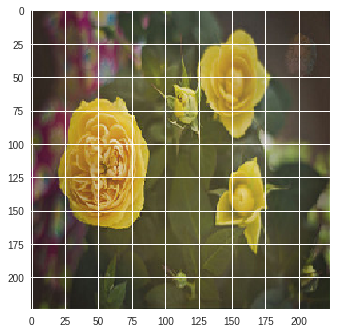

In [ ]:
plt.imshow(X[1239])

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,5)


In [ ]:
X = np.array(X)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)
np.random.seed(42)
tf.set_random_seed(42)
rn.seed(42)

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(X_train)

In [ ]:
model = Sequential()

model.add(InceptionV3(include_top=False,weights='imagenet', input_shape=(image_size,image_size,3)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.layers[0].trainable = False

In [ ]:
model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),epochs=5,verbose=1,validation_data=(X_test,Y_test),steps_per_epoch=X_train.shape[0] // 32)

Epoch 1/5
101/101 [==============================] - 71s 704ms/step - loss: 1.2161 - acc: 0.6535 - val_loss: 3.5030 - val_acc: 0.4801
Epoch 2/5
101/101 [==============================] - 50s 494ms/step - loss: 0.7604 - acc: 0.7452 - val_loss: 2.3690 - val_acc: 0.5726
Epoch 3/5
101/101 [==============================] - 50s 498ms/step - loss: 0.6690 - acc: 0.7710 - val_loss: 1.2189 - val_acc: 0.6920
Epoch 4/5
101/101 [==============================] - 51s 500ms/step - loss: 0.6097 - acc: 0.7887 - val_loss: 2.1343 - val_acc: 0.5902
Epoch 5/5
101/101 [==============================] - 50s 500ms/step - loss: 0.5708 - acc: 0.7972 - val_loss: 1.7109 - val_acc: 0.6318
